# Introduction to Machine Learning
## Classification
One of the very famous classification problems in Machine Learning is the IRIS Flower classification problem.  We want to predict the class of Iris given the Sepal, Petal lengths and widths.  The data we will use are in a file called Iris_Data.csv found in 

https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv

## Basic Data Analysis
Q1. Let's load the data from the url and perform basic data analysis.


*   Check the sample size
*   Check for the features
*   Check if there is any missing values



In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv'
df = pd.read_csv(url)
print(df.head())

# Check the sample size

# Check the features

# Check for missing values


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
#@title
import pandas as pd
url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv'
df = pd.read_csv(url)
print(df.head())
print('>>> Check the sample size:')
print(df.shape)
print('>>> Check for the features: ')
print(df.describe())
print('>>> Check for missing values')
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
>>> Check the sample size:
(150, 5)
>>> Check for the features: 
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.9


Let us first understand the datasets.  It consists of:
*   150 rows of data
*   The 3 **labels** are Iris-virginica, Iris-setosa and Iris-versicolor
*   The 4 **features** are Sepal length, Sepal width, Petal length, Petal width in cm
*   There is no missing values

This is a **multi-class classification** problem, as there are more than 2 classes to be predicted.  



## Exploratory Data Analysis

Q2. Let's perform a univariate analysis on the data with

*   a count plot to show the counts of each category of Iris species.  
*   histograms to show the distribution of the 4 features, petal_width, petal_length, sepal_,length, sepal_width



In [ ]:
# count plot using matplotlib



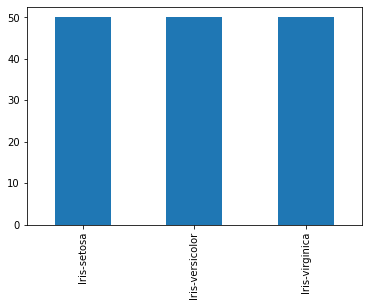

In [3]:
#@title
# count plot using matplotlib

import matplotlib.pyplot as plt

df['species'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# count plot using seaborn



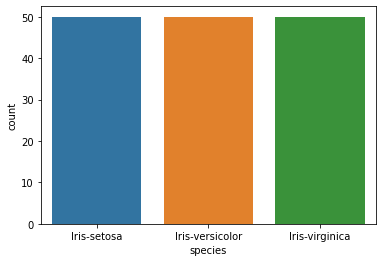

In [3]:
#@title
# count plot using seaborn

import seaborn as sns
ax = sns.countplot(x='species', data=df)

In [ ]:
# Historgram to show distribution of features

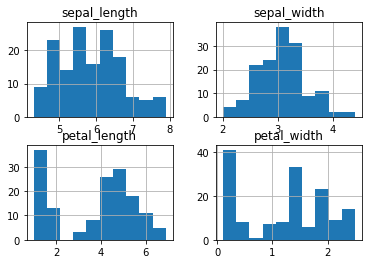

In [4]:
#@title
# Histogram to show distribution of features
df.hist()
plt.show()

In [ ]:
# Histrogram with density plot (kde) using seaborn

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


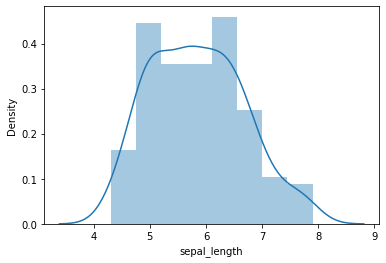

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


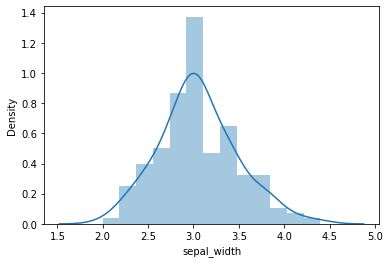

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


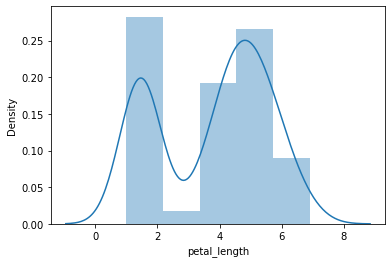

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


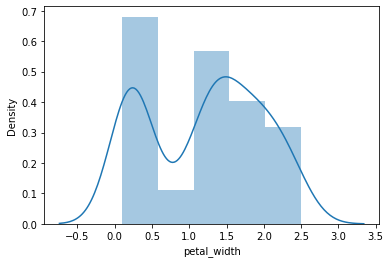

In [5]:
#@title
# Histrogram with density plot (kde) using seaborn

sns.distplot(df['sepal_length'], kde=True)
plt.show()
sns.distplot(df['sepal_width'], kde=True)
plt.show()
sns.distplot(df['petal_length'], kde=True)
plt.show()
sns.distplot(df['petal_width'], kde=True)
plt.show()

Q3. Let's perform multivariate analysis on the data with

*  Scatter matrix 
*  Box plot

In [ ]:
# Scatter matrix / pair plots

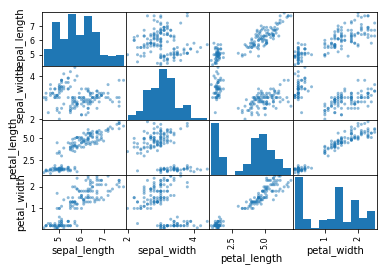

In [6]:
#@title
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [ ]:
# pairplots using sns

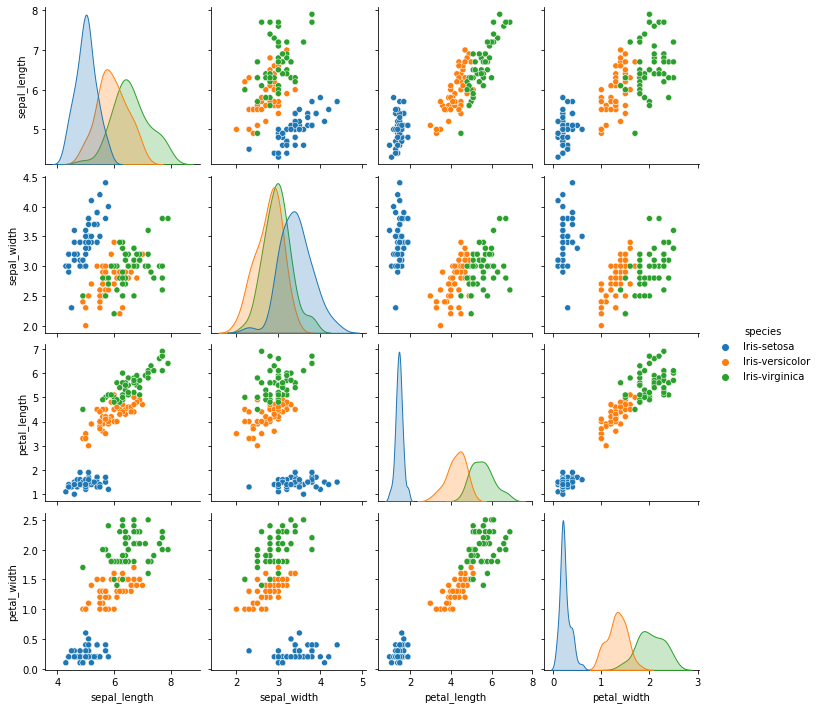

In [ ]:
#@title
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
# box plot using sns

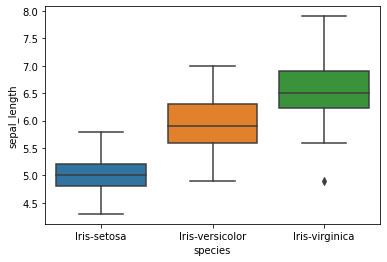

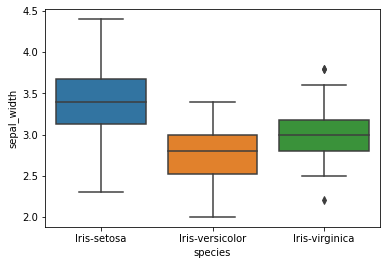

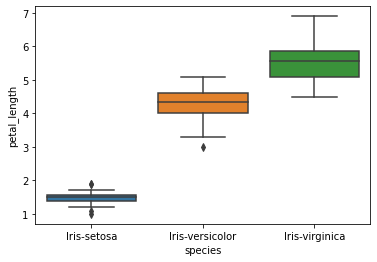

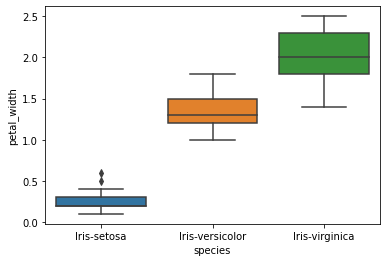

In [ ]:
#@title

sns.boxplot(x='species', y='sepal_length', data=df)
plt.show()
sns.boxplot(x='species', y='sepal_width', data=df)
plt.show()
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()


## Data Modelling

Q4. IRIS class prediction is a multiclass classification problem where target variable has three classes.  The goal is to construct a function which will correctly predict the class to which the new point belongs.

We are going to need some data validate the accurary of our model.  We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will use to validate our model.

*  Create a validation test set using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function


In [ ]:
# Create a validation test set by splitting the data into 80/20 
from sklearn.model_selection import train_test_split



In [6]:
#@title
# Create a validation test set by splitting the data into 80/20 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=7)

# df.values will return the data as numpy array

# Take all rows, take columns 0,1,2,3. Total 4 columns.
# X = Features. In this case there are multiple features.
X = train.values[:,0:4]

# Take all rows, only take 5th column. Note that array starts from 0, meaning 4 = 5th column.
# In another word, we are taking the Label from each row
# Y = Label
Y = train.values[:,4]

# Take all rows from test set. Get X (Features)
x_test = test.values[:,0:4]

# Take all rows from test set. Get Y (Label)
y_test = test.values[:,4]


In [ ]:
train.values[:,4]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica

Q5.  Proceed to train the data using Logistic Regression and K Nearest Neighbours.  Compute the accuracy score for both algorithm.

[Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html)

In [11]:
#@title
from sklearn import linear_model, neighbors
from sklearn.metrics import accuracy_score

#sklearn is the main library for generating the model. 

# Logistic Regression is normally used for Classification.
# multi_class as there are mutiple features.
classifier = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')
# We then fit X (Features) and Y (Label) into the classifier.
# Do take note that X and Y are train set we retrieved above.
# When we fit, we train the classifier using the X and Y datasets.
classifier.fit(X,Y)
# Once we trained (using the fit function above), we can use the classifier to predict.
# To predict, we call the predict function, with the x_test (Features) set.
# Note that x_test is the dataset we split out above.
predictions=classifier.predict(x_test)
# Once the prediction is done, we will print out the score using the accuracy_score function.
# accuracy_score takes in the y_test (Label)(The actual result) and also the predictions.
# Do note that predictions is generated using x_test above.
print(accuracy_score(y_test, predictions))
# The result is 0.8. TODO: Is 0.8 good or bad?


# Similar to Logistic Regression example above, this is the example on another algorithm.
# The KNeighbors Classifier. (TODO: How KNeighbor works?)
classifier = neighbors.KNeighborsClassifier()
# Similiar to above, we use the fit to train.
# Remember we fit the train set X and Y into the classifier.
classifier.fit(X,Y)
predictions=classifier.predict(x_test)
print(accuracy_score(y_test, predictions))
# We actually get better results (is it better?) using KNeigbors.
# Likely, when we train model, we will always test out different algorithm to find the best
# algorithm to train our model.
# We can always test the value.


0.8
0.9


Q6. Use K-fold cross-validation technique to randomly splits the training set into 10 distinct subsets to train and evaluate the Logistic Regression and KNN models 10 times and compare their results.  
[Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
# We performed Cross Validation because we doesn't have enough data!
# Save us some data that we split our training set out.
# Prevent us selecting an easy validation set. Because we are taking the validation set from different fold.
# Cross Validation is optional. 

# What is the purpose of validation set?
# The validation set is a set of data, separate from the training set, that is used to validate our model performance during training. 
# This validation process gives information that helps us tune the model's hyperparameters and configurations accordingly.

In [18]:
#@title
from sklearn import model_selection

models = {}
# Create a model dictionary, and save 2 var for LogisticRegression and KNN.
# Do take note that the linear_model and neighbors are imported above (Question5)
models['LR'] = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')
models['KNN'] = neighbors.KNeighborsClassifier()

results = []
names = []
score = 'accuracy'

#For each models, in this case 0-LR and 
for name in models:
  model = models.get(name)
  kfold = model_selection.KFold(n_splits=10)
  skfold = model_selection.StratifiedKFold(n_splits=5,shuffle=True)
  # Model is the estimator. Estimator in this case is the algorithm. Depending on whether it is LR or KNN.
  # CV refers to the number of fold.
  cv_results = model_selection.cross_val_score(model, X, Y, cv=skfold, scoring=score)
  results.append(cv_results)
  names.append(name)

  print(name, 'cv_result', cv_results)
  print('{}: {} ({})'.format(name, cv_results.mean(), cv_results.std()))

LR cv_result [1.         1.         0.95833333 1.         0.875     ]
LR: 0.9666666666666668 (0.0485912657903775)
KNN cv_result [0.95833333 1.         0.95833333 1.         1.        ]
KNN: 0.9833333333333334 (0.020412414523193135)


## Regression

In machine learning, regression is used to predict the outcome of an event based on the relationship between variables obtained from the data-set.  Suppose we want to know if money makes people happy.  

Q7. Let's load the [Better Life Index data](https://raw.githubusercontent.com/nyp-sit/data/master/Better_Life.csv) provided by OECD.  Examine and transform the data accordingly.



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Better_Life.csv'
# load the data set

In [21]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Better_Life.csv'
df = pd.read_csv(url)
life_df = df.loc[(df['Indicator'] == 'Life satisfaction') & (df['Inequality'] == 'Total')]
life_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


Q8. Load the[ GDP per capita](https://raw.githubusercontent.com/nyp-sit/data/master/WEO_Data.csv) data provided by IMF.

In [ ]:
url1 = 'https://raw.githubusercontent.com/nyp-sit/data/master/WEO_Data.csv'
# load the data set

In [22]:
#@title
url1 = 'https://raw.githubusercontent.com/nyp-sit/data/master/WEO_Data.csv'
gdp_df = pd.read_csv(url1, encoding='latin-1', thousands=',')
gdp_df.head()

,Country,Subject Descriptor,Units,Scale,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,14414.300,2011.0


Q9. Prepare the data by merging the OECD's life satisfaction data and IMF's GDP per capita data.  

*   Rename the colums to Country, Life satisfaction and GDP per capita
*   Set the index to 'Country'


In [25]:
#@title
pdf = pd.merge(gdp_df[['Country', '2015']], life_df[['Country', 'Value']] , on='Country', how='inner') 
print(pdf.head())
pdf.rename(columns={'Value':'Life satisfaction','2015':'GDP per capita'}, inplace=True)
pdf.head()

     Country      2015  Value
0  Australia  50961.87    7.3
1    Austria  43724.03    7.0
2    Belgium  40106.63    6.9
3     Brazil   8670.00    6.6
4     Canada  43331.96    7.3


,Country,GDP per capita,Life satisfaction
0,Australia,50961.87,7.3
1,Austria,43724.03,7.0
2,Belgium,40106.63,6.9
3,Brazil,8670.00,6.6
4,Canada,43331.96,7.3


Q10. Plot the scatter plot to show the relationship between Life satisfaction and GDP per capita

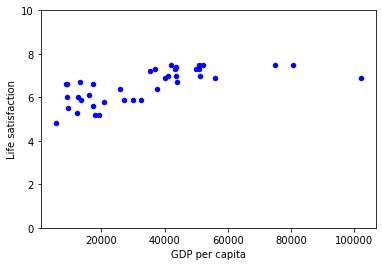

In [26]:
#@title
ax1=pdf.plot.scatter(x = 'GDP per capita', y = 'Life satisfaction', c='blue', ylim=[0,10])
plt.show()

Q11.  Train the model and make a prediction for Cyprus with a GDP per capita of 22587

In [29]:
#@title
X = np.c_[pdf['GDP per capita']]
y = np.c_[pdf['Life satisfaction']]

lin_reg_model = sklearn.linear_model.LinearRegression()
lin_reg_model.fit(X, y)
X_new = [[22587]]
lin_reg_model.predict(X_new)

array([[6.24626326]])